## 1. Paper Discussion

<div style="text-align: justify">
<font  style="color:blue">(a) Please outline the claims in these two papers.</font> - The authors propose two novel and scalable approaches for mining quality phrases using weakly and distantly supervised techniques and claim that the phrases generated are close to human judgement i.e. have superior performance.
</div><br>

<div style="text-align: justify">
<font  style="color:blue;text-align: justify">(b) What is the major problem when someone is going to apply SegPhrase to a new corpus? Is there any human effort?</font> - SegPhrase requires (~200-300) phrase annotations from experts, hence also not a fully automated approach. Choosing which phrase candidates to annotate is also challenging as there can be millions of plausible candidates.
</div><br>

<div style="text-align: justify">
<font  style="color:blue">(c) What is the motivation of AutoPhrase? Compared with SegPhrase, which parts do you believe are novel?</font> - AutoPhrase addresses the limitations of SegPhrase requiring expert annotations by employing public knowledge bases consisting of a large volume of high-quality phrases (aka "Positive-Only Distant learning"), and hence also an automated phrase mining technique. Another novelty that authors introduce is incoporating parts-of-speech (POS) tags to improve the performance of phrasal segmentation stage. 
</div><br>

<div style="text-align: justify">
<font  style="color:blue">(d) Why do we want to evaluate the results following the pooling strategy? Think about how much human effort is required, if we are not using pooling.</font> - We can have scenarios where we dont have readily available knowledge bases for evaluation. Hence we need to rely on humans to judge the quality of phrases, which in turn involves evaluating millions of phrases manually and is quite a hassle, expensive, and time-consuming prospect. So, to do evaluation in an affordable manner we ask all the competing methods to nominate 500 candidate phrases for human evaluation. This pooling strategy makes evaluation fair to every method.
</div><br>

<div style="text-align: justify">
<font style="color:blue">(e) What are the drawbacks of these two papers? Do you see any limitations?</font> - First major issue I feel is that both SegPhrase and AutoPhrase are context-free approaches, meaning they assume that a phrase should either be included or excluded entirely, which is clearly not an intuitive idea. Secondly, both rely on expensive human evaluations to judge the quality of phrases in scenarios where we dont have relevant knowledge bases. Even in cases where candidates can be identified via knowledge bases, Precision and Recall are biased.
</div><br>

<div style="text-align: justify">
<font style="color:blue">(f) Can we do better in order to address these limitations? Propose a few ideas and explain how these would address the limitations.</font> - In order to achieve context-awareness, in addition to using global frequency based quality measures, we can come up with measures (features) that incoporate local contexts such as using conditional probabilities of word sequences. Another idea to address context-free issue would be to use attention maps where we can easily model the association of phrases in a sentence and incorporate context awareness while mining phrases.
</div><br>

## 2. Phrase Mining Experiments

In [1]:
# import required libraries
import re, glob
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

from tqdm import tqdm
from pprint import pprint
from scipy import sparse
from random import sample
from collections import defaultdict, Counter

import warnings
warnings.simplefilter("ignore")

# custom visualisation styling
custom = {"axes.edgecolor": "red", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("darkgrid", rc=custom)

<Figure size 800x600 with 0 Axes>

#### <font  style="color:Indigo">(a) Use AutoPhrase to extract high quality phrases on DBLP</font>

In [2]:
def read_txt(f_path):
    with open(f_path) as f:
        txt = f.read()
    return txt

In [3]:
items = glob.glob("/Users/aakash_agrawal/UCSD/FA24 - DSC253 - Text Mining/AutoPhrase/models/DBLP/*")
for i in items:
    print(i)

/Users/aakash_agrawal/UCSD/FA24 - DSC253 - Text Mining/AutoPhrase/models/DBLP/AutoPhrase_single-word.txt
/Users/aakash_agrawal/UCSD/FA24 - DSC253 - Text Mining/AutoPhrase/models/DBLP/AutoPhrase_multi-words.txt
/Users/aakash_agrawal/UCSD/FA24 - DSC253 - Text Mining/AutoPhrase/models/DBLP/segmentation.model
/Users/aakash_agrawal/UCSD/FA24 - DSC253 - Text Mining/AutoPhrase/models/DBLP/token_mapping.txt
/Users/aakash_agrawal/UCSD/FA24 - DSC253 - Text Mining/AutoPhrase/models/DBLP/segmentation.txt
/Users/aakash_agrawal/UCSD/FA24 - DSC253 - Text Mining/AutoPhrase/models/DBLP/AutoPhrase.txt
/Users/aakash_agrawal/UCSD/FA24 - DSC253 - Text Mining/AutoPhrase/models/DBLP/language.txt


#### <font  style="color:Indigo"> (b) Phrases with abnormal scores</font>

<font style="color:blue">Did you find any phrases with abnormal scores (e.g. non-phrase with a high score or good phrase with a low score)? Do they show a systematic pattern? What can be the possible reason behind it and how to improve the algorithm to avoid such mistakes?</font>

Phrases having high quality scores look good and seem to capture the requirements of high quality phrases.

<ins>Some good phrases with low score:</ins>
* **strong law of large numbers** - 0.478510 (a legit good quality phrase, would expect quality scoreto be >0.9)
* **a new iterative algorithm** - 0.018224 (seems like a complete, informative and concordant phrase)
* **an awareness system** - 0.019240 (seems like a complete, informative, popular and concordant phrase)
* **a verification task** - 0.019689 (seems like a complete, informative, popular and concordant phrase)

<ins>Some non-phrases with high score:</ins>
* **_n** - 0.674333	(non-phrase, but high score)
* **later** - 0.727122 (doesnt seem like a quality phrase, lacks **informativeness**)
* **aspecific** - 0.556505 (doesnt seem like a quality phrase, lacks **informativeness**, more like a stop phrase)
* **vision based pedestrian** - 0.581264 (vision based pedestrian <font style="color:magenta"> **detection**</font> would be a quality phrase)

<ins>Possible Reason and mitigation:</ins> <font style="color:red">**Some good quality phrases might have been binned into negative pool because they were not identified in the knowledge bases**.</font> <font style="color:green">**Maybe we can use some unsupervised methods to create positive pool from the corpus rather than solely relying on knowledge bases**.</font>

In [4]:
auto_phrases = read_txt("/Users/aakash_agrawal/UCSD/FA24 - DSC253 - Text Mining/AutoPhrase/models/DBLP/AutoPhrase.txt")
i = 0
for ph in auto_phrases.split('\n'):
    print(ph)
    if i > 10:
        break
    i += 1

0.9873630590	matrix multiplication
0.9862430656	kolmogorov complexity
0.9857091092	importance sampling
0.9856701633	cellular automaton
0.9849366345	wireless lan
0.9847735482	optical fiber
0.9844960131	amazon mechanical turk
0.9844804034	computed tomography
0.9843436610	sun microsystems
0.9841926904	ifip tc3
0.9841911578	amd opteron
0.9841785537	spanning trees


In [5]:
# convert txt to csv
from io import StringIO
data = StringIO(auto_phrases)
df = pd.read_csv(data, sep='\t', header=None, names=["quality_score", "phrase"])

In [6]:
print(df.sample(10))

        quality_score                           phrase
699637       0.019419     for specifying and reasoning
257070       0.507358         descendant relationships
538182       0.105628              observations during
228936       0.562346                       gene chips
233422       0.554567             numeric optimization
502031       0.136577         algorithmic optimization
191881       0.625858                               47
676869       0.029658             the basic properties
687198       0.025218  the fundamental characteristics
639318       0.046514                  battery life by


#### <font style="color:Indigo">(c) Word2Vec on Segmented Corpus</font>

In [7]:
# required libraries for word2vec
import gensim

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.test.utils import get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec

# required libraries from nltk for preprocessing
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize, sent_tokenize

ps = PorterStemmer()
stop = set(stopwords.words('english'))

#### Preprocessing

In [8]:
# common preprocessing function - from HW1
def clean_text_and_tokenise(doc, stem=False, rm_stop=False):
    MIN_TOKEN_LEN = 2
    MAX_TOKEN_LEN = 15
    
    # remove non-alpha numeric characters and strip off braces
    doc = re.sub(r'[^\w\s]', '', doc)
    doc = re.sub(r'[\{\}\[\]\(\)]', '', doc)
    
    # remove stopwords and apply stemming
    tokens = doc.strip().lower().split(" ")

    op_tokens = []
    for word in tokens:
        if MIN_TOKEN_LEN<=len(word)<=MAX_TOKEN_LEN:
            if stem:
                word = ps.stem(word)
            if rm_stop:        
                if word in stop:
                    continue
            op_tokens.append(word)
    return op_tokens

In [9]:
# helper function to smartly parse phrases in doc
def smart_split(text, use_context_words=False):
    # temporarily replace periods inside <phrase_Q=...> tags with a placeholder, scores will have a <<DOT>>
    text_with_placeholder = re.sub(r'(<phrase_Q=[^>]+>.*?</phrase>)', lambda m: m.group(0).replace('.', '<<DOT>>'), text)

    # split the text based on periods outside <phrase_Q=...> tags
    sentences = re.split(r'\.(?![^<]*</phrase>)', text_with_placeholder)
    
    # restore the original periods inside the placeholders
    sentences = [sentence.replace('<<DOT>>', '.') for sentence in sentences if sentence.strip()]

    # we need to extract both phrases and non-phrase words while keeping order
    result = []
    phrase_list = []
    
    for sentence in tqdm(sentences):
        sentence_tokenised = []
        
        # extract both phrases and words outside the <phrase_Q=...> tags
        parts = re.split(r'(<phrase_Q=[^>]+>.*?</phrase>)', sentence)
        
        for part in parts:
            if part.startswith('<phrase_Q='):
                # extract the phrase without the <phrase_Q=...> tags
                phrase = "_".join(re.sub(r'<.*?>', '', part).lower().split(" "))
                if len(phrase)>1:
                    sentence_tokenised.append(phrase)
                    phrase_list.append(phrase)
            elif part.strip() and use_context_words:
                # add non-phrase words as well
                sentence_tokenised.extend(clean_text_and_tokenise(part))

        # extend the tokenised sentence to result
        result.append(sentence_tokenised)
    return phrase_list, result

In [10]:
# read the segmentation.txt file
seg_corpus = read_txt("/Users/aakash_agrawal/UCSD/FA24 - DSC253 - Text Mining/AutoPhrase/models/DBLP/segmentation.txt")

In [11]:
# split text file into sentences using the smart method
phrase_list, sentences = smart_split(seg_corpus, use_context_words=True)

100%|██████████████████████████████| 5748044/5748044 [01:18<00:00, 73003.18it/s]


#### Modeling

In [12]:
# this will be a shallow deep learning model
wv_model = Word2Vec(
    sentences=sentences,
    min_count=1, # ignores all words with a total frequency lower than this value.
    window=3, # model will consider the n words before and n words after that word as part of the context.
    negative=3, # k=the number of negative samples to use
    sg=1, # use Skip-Gram model.
    vector_size=100,
    workers=4
)

In [13]:
# building vocab
wv_model.build_vocab(sentences, progress_per=10000)
print(wv_model.corpus_count)

5748044


In [14]:
# word2vec model training
wv_model.train(
    sentences, 
    total_examples=wv_model.corpus_count, 
    epochs=10, 
    start_alpha=0.04,
    end_alpha=0.0001
)

(637596466, 816992210)

In [15]:
# normalize the word vectors and free up memory
wv_model.init_sims(replace=True)

In [16]:
# get semantic representation from word2vec model
def get_word_vector(phrase, wv_model):
    try:
        return wv_model.wv[phrase]
    except KeyError:
        pass

In [17]:
# create phrase word vector map
phrase_wv_dict = {}
for i in phrase_list:
    phrase_wv_dict[i] = get_word_vector(i, wv_model)

phrase_wv_dict = {k: v for k, v in phrase_wv_dict.items() if v is not None}

# list of vectors and list of words
vectors = np.array([vec for vec in phrase_wv_dict.values()])
phrases = list(phrase_wv_dict.keys())

#### <font style="color:Indigo">(d) Phrase Clustering </font>

In [18]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

def clustering(vectors, method="kmeans", n_clusters=6):
    centroids = None

    if method=="kmeans":
        # kmeans model
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(vectors)
        
        # get the cluster labels and the centroids
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_

    if method=="gmm":
        # Gaussian Mixture model
        gmm = GaussianMixture(n_components=n_clusters)
        gmm.fit(vectors)
        labels = gmm.predict(vectors)
        
    return labels, centroids

In [19]:
# apply clustering
method = "kmeans"
num_clusters = 6
labels, centroids = clustering(vectors, method, num_clusters)

# apply PCA to reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)
centroids_2d = pca.transform(centroids)

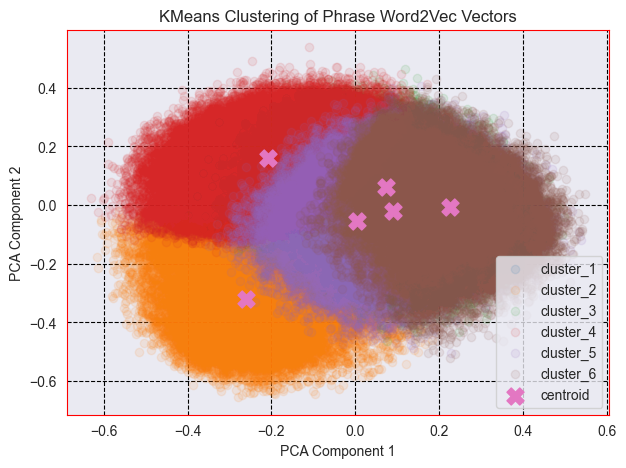

In [20]:
# 2D - visualisation
plt.figure(figsize=(7,5))

# scatter plot of the word vectors with different colors for each cluster
for i in range(num_clusters):
    plt.scatter(reduced_vectors[labels == i, 0], reduced_vectors[labels == i, 1], label=f"cluster_{i+1}", alpha=0.1)

# scatter plot for the centroids
if method == "kmeans":
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=150, c='#e377c2', marker='X', label="centroid")

plt.title("KMeans Clustering of Phrase Word2Vec Vectors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [21]:
# clusters k-means clustering algorithm
def curate_cluster_wise_phrases(labels):
    cluster_kmeans = {}
    for value in np.arange(0, 6):
        idxs = sample(list(np.where(labels == value)[0]), 20)
        cluster_kmeans[value+1] = [phrases[i] for i in idxs]
    return cluster_kmeans

In [22]:
def display_cluster_values(cluster):
    for i in range(0, num_clusters, 3):
        cluster_left = cluster[i+1]
        cluster_mid = cluster[i+2] if i+1 < num_clusters else None
        cluster_right = cluster[i+3] if i+2 < num_clusters else None
    
        df_left = pd.DataFrame(cluster_left)
        df_mid = pd.DataFrame(cluster_mid) if cluster_mid is not None else pd.DataFrame()
        df_right = pd.DataFrame(cluster_right) if cluster_right is not None else pd.DataFrame()
    
        df_left.columns = [f"Cluster {i+1}"]
        if not df_mid.empty:
            df_mid.columns = [f"Cluster {i+2}"]
        if not df_right.empty:
            df_right.columns = [f"Cluster {i+3}"]
    
        combined_df = pd.concat([df_left, df_mid, df_right], axis=1)
        print(combined_df.to_markdown(tablefmt="orgtbl"))
        print("\n")

In [23]:
print(f"##### K-Means Clusters #####")
cluster_kmeans = curate_cluster_wise_phrases(labels)
display_cluster_values(cluster_kmeans)

##### K-Means Clusters #####
|    | Cluster 1                              | Cluster 2                            | Cluster 3                  |
|----+----------------------------------------+--------------------------------------+----------------------------|
|  0 | bourn                                  | scallops                             | request-to-send            |
|  1 | tabu-search-based                      | navarre                              | event_scheduling           |
|  2 | incremental-update                     | ausaid                               | resistive_bridges          |
|  3 | computationally-equivalent             | dans_les_documents                   | indirectly_affect          |
|  4 | model-based_user-interface_development | rodgers                              | component_substitution     |
|  5 | imperfective_aspect                    | semi-arid_climate                    | pentium-iv_pc              |
|  6 | monty_python                        

In [24]:
print(f"##### GMM Clusters #####")
labels, centroids = clustering(vectors, "gmm", n_clusters=6)
cluster_gmm = curate_cluster_wise_phrases(labels)
display_cluster_values(cluster_gmm)

##### GMM Clusters #####
|    | Cluster 1                     | Cluster 2                            | Cluster 3                 |
|----+-------------------------------+--------------------------------------+---------------------------|
|  0 | eigenvalue-based              | conflict_identification              | force_sensation           |
|  1 | ranking_queries               | initial_requirements                 | travertine                |
|  2 | media_literacy                | visualizer                           | apraxia                   |
|  3 | color/edge                    | technical_devices                    | anisotropic_filtering     |
|  4 | half_mirror                   | differential_files                   | left_inferior_frontal     |
|  5 | transformation_-_tools        | failure-driven                       | subspace-based            |
|  6 | baseband_processing           | component-based_software_engineering | geometric_transformation  |
|  7 | ejb-based     

### <ins><font style="color:Indigo">Qualitative Comparison of Phrase Clusters</font></ins>:

<div style="display: inline-block">

| **Cluster** | **Likely Group (k-means)** | **Likely Group (Gaussian Mixture model)** |
|:---  |:--- |:--- |
| 1    | Optimization Algorithms       | Information Processing       |
| 2    | Software Engineering       | Software Engineering       |
| 3    | Communication Networks        | Bioelectronics       |
| 4    | Security, Distributed Systems   | System Design and Computational Complexity   |
| 5    | Image Processing       |  Security, Networking   |
| 6    | Cryptography, and Algorithms   |  Research and Development  |

</div>



<div style="text-align: justify">
<font style="color:blue;text-align: justify">Assigning a phrase to a specific topic within different areas of computer science is quite challenging. However, both K-means and GMM clusters yield similar results. For instance, Cluster 2 in both cases relates to software engineering, while Cluster 3 in K-means corresponds to electronics and communication, and in GMM, it appears to be related to both biology and electronics. Additionally, Cluster 4 in K-means closely resembles Cluster 5 in GMM.</font>
</div><br>